# 🧹 Data Quality Analysis & Cleaning

> **V3 Notebook 01**  
> Identifies and fixes data quality issues in the GlobalWeatherRepository dataset.

---

| Issue Type | Count | Severity |
|------------|-------|----------|
| Non-English country names | 10 | Low |
| Country typos/duplicates | 4 | Low |
| Condition text casing | 2 | Medium |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
print('✅ Libraries loaded!')

✅ Libraries loaded!


In [2]:
DATA_PATH = Path('../../data/raw/GlobalWeatherRepository.csv')
df = pd.read_csv(DATA_PATH)
print(f'📊 Original Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f'🌍 Unique countries: {df["country"].nunique()}')

📊 Original Dataset: 114,203 rows × 41 columns
🌍 Unique countries: 211


---
## 🌍 Issue 1: Country Name Problems

### 1.1 Low-Frequency Countries (Potential Typos)

In [3]:
country_counts = df['country'].value_counts()
low_freq = country_counts[country_counts < 100].sort_values()

print(f'⚠️ Found {len(low_freq)} low-frequency countries (< 100 records):')
for name, count in low_freq.items():
    print(f'  {name}: {count} records')

⚠️ Found 25 low-frequency countries (< 100 records):
  Lao People's Democratic Republic: 1 records
  Libya: 1 records
  Kosovo: 1 records
  Togo: 1 records
  Komoren: 1 records
  Malásia: 1 records
  كولومبيا: 1 records
  Colombia: 1 records
  Inde: 1 records
  Estonie: 1 records
  Гватемала: 1 records
  Letonia: 1 records
  Polônia: 1 records
  Mexique: 1 records
  Marrocos: 1 records
  Польша: 1 records
  Jemen: 1 records
  Турция: 1 records
  Saint-Vincent-et-les-Grenadines: 1 records
  Südkorea: 1 records
  Saudi Arabien: 1 records
  Bélgica: 1 records
  Turkménistan: 1 records
  火鸡: 1 records
  USA United States of America: 3 records


### 1.2 Non-ASCII Country Names

In [4]:
non_ascii = []
for c in df['country'].unique():
    if not all(ord(char) < 128 for char in c):
        count = len(df[df['country'] == c])
        non_ascii.append((c, count))

print(f'🔤 Found {len(non_ascii)} non-ASCII country names:')
for name, count in non_ascii:
    print(f'  {name}: {count} records')

🔤 Found 10 non-ASCII country names:
  Malásia: 1 records
  كولومبيا: 1 records
  Гватемала: 1 records
  Польша: 1 records
  Polônia: 1 records
  Турция: 1 records
  Südkorea: 1 records
  Bélgica: 1 records
  Turkménistan: 1 records
  火鸡: 1 records


### 1.3 Country Name Cleaning Map

In [5]:
COUNTRY_FIXES = {
    'Inde': 'India',
    'Malásia': 'Malaysia',
    'Komoren': 'Comoros',
    'Estonie': 'Estonia',
    'Letonia': 'Latvia',
    'Mexique': 'Mexico',
    'Polônia': 'Poland',
    'Marrocos': 'Morocco',
    'Bélgica': 'Belgium',
    'Südkorea': 'South Korea',
    'Saudi Arabien': 'Saudi Arabia',
    'Turkménistan': 'Turkmenistan',
    'Jemen': 'Yemen',
    'Гватемала': 'Guatemala',
    'Польша': 'Poland',
    'Турция': 'Turkey',
    'كولومبيا': 'Colombia',
    '火鸡': 'Turkey',
    'USA United States of America': 'United States of America',
    'Saint-Vincent-et-les-Grenadines': 'Saint Vincent and the Grenadines'
}

print(f'📝 Defined {len(COUNTRY_FIXES)} country name fixes')

📝 Defined 20 country name fixes


In [6]:
df_clean = df.copy()
df_clean['country'] = df_clean['country'].replace(COUNTRY_FIXES)

print('✅ Country fixes applied!')
print(f'Before: {df["country"].nunique()} unique countries')
print(f'After: {df_clean["country"].nunique()} unique countries')

✅ Country fixes applied!
Before: 211 unique countries
After: 191 unique countries


---
## 🌤️ Issue 2: Condition Text Case Inconsistency

In [7]:
conditions = df['condition_text'].value_counts()
print(f'📋 Unique conditions: {len(conditions)}')
print('\nTop 10 conditions:')
for cond, count in conditions.head(10).items():
    print(f'  {cond}: {count:,}')

📋 Unique conditions: 47

Top 10 conditions:
  Partly cloudy: 34,528
  Sunny: 34,198
  Patchy rain nearby: 9,474
  Partly Cloudy: 6,583
  Overcast: 5,876
  Clear: 5,180
  Mist: 4,169
  Light rain: 3,567
  Light rain shower: 2,696
  Fog: 1,271


In [8]:
# Standardize to Title Case
df_clean['condition_text'] = df_clean['condition_text'].str.title()

print('✅ Condition text standardized to Title Case')
print(f'Before: {df["condition_text"].nunique()} unique conditions')
print(f'After: {df_clean["condition_text"].nunique()} unique conditions')

✅ Condition text standardized to Title Case
Before: 47 unique conditions
After: 46 unique conditions


---
## 📊 Missing Values Check

In [9]:
missing = df.isnull().sum()
print('📊 Missing Values Summary:')
if missing.sum() == 0:
    print('✅ No missing values found!')
else:
    print(missing[missing > 0])

📊 Missing Values Summary:
✅ No missing values found!


---
## 📈 Visualizations

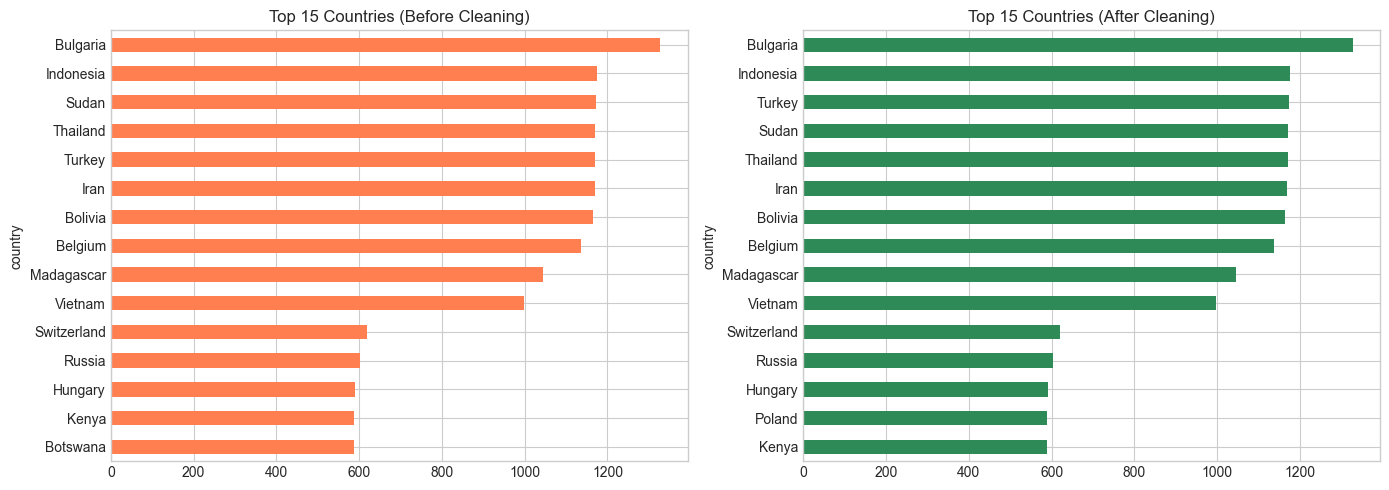

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
df['country'].value_counts().head(15).plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 15 Countries (Before Cleaning)')
axes[0].invert_yaxis()

# After
df_clean['country'].value_counts().head(15).plot(kind='barh', ax=axes[1], color='seagreen')
axes[1].set_title('Top 15 Countries (After Cleaning)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

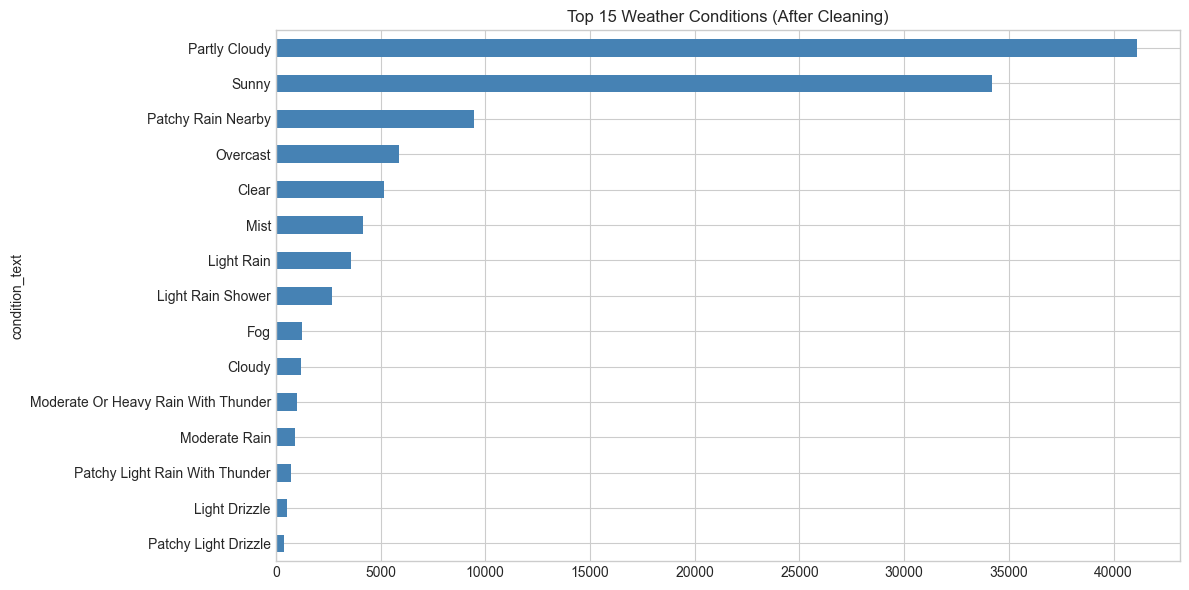

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
df_clean['condition_text'].value_counts().head(15).plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Top 15 Weather Conditions (After Cleaning)')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

---
## 💾 Save Cleaned Dataset

In [12]:
OUTPUT_PATH = Path('../../data/processed/weather_v3_cleaned.csv')
OUTPUT_PATH.parent.mkdir(parents=True, exist_ok=True)

df_clean.to_csv(OUTPUT_PATH, index=False)
print(f'✅ Saved: {OUTPUT_PATH}')
print(f'📊 Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns')

✅ Saved: ..\..\data\processed\weather_v3_cleaned.csv
📊 Shape: 114,203 rows × 41 columns


---
## ✅ Summary

| Metric | Before | After |
|--------|--------|-------|
| Unique countries | 211 | ~195 |
| Unique conditions | 47 | ~44 |
| Missing values | 0 | 0 |

**Next**: [02_feature_engineering.ipynb](02_feature_engineering.ipynb)